# KNN Classifier....

### Business Problem: Whether a person will have diabetes or not?

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [23]:
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


### Steps to perform first to create Model:
    1.) Domain analysis
    2.) EDA (write insights from that)
    3.) Statistical analysis
    4.) Data Preprocessing

In [24]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* No missing values. 

## Let's see how the data is distributed.:

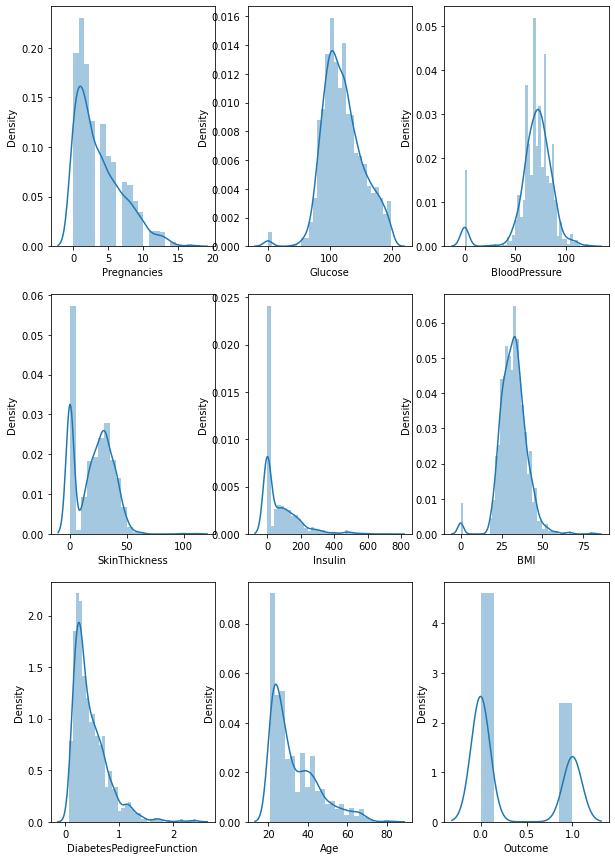

In [25]:
plt.figure(figsize=(10,15),facecolor='white')
plotnumber=1

for feature in data:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[feature])
        plt.xlabel(feature)
    plotnumber+=1
plt.show()

* As we can see there is some skewness in the data. 
* And some imputation also we need to do .

In [26]:
data['BMI']=data['BMI'].replace(0,data['BMI'].median())

In [27]:
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].median())

In [28]:
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())

In [29]:
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())

### Now, Let's see the distribution after imputation:

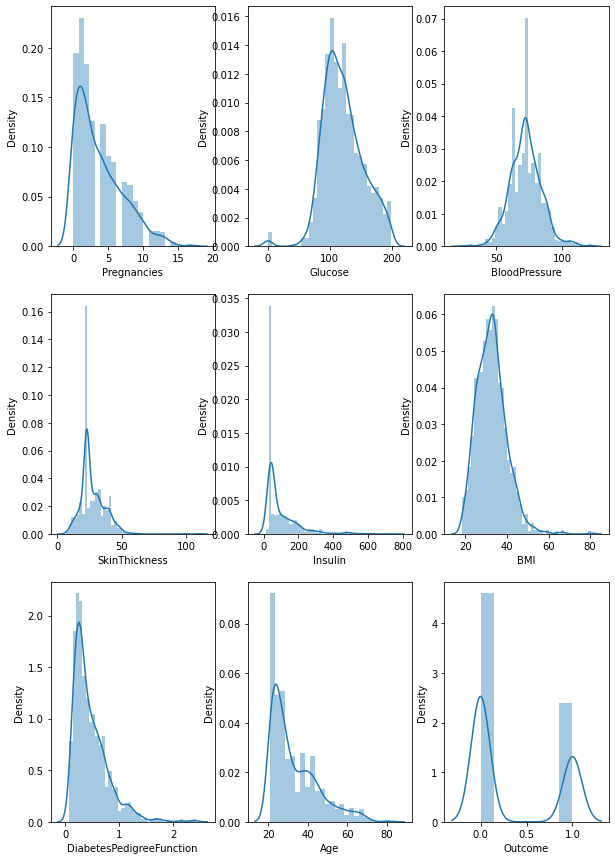

In [30]:
plt.figure(figsize=(10,15))
plotnumber=1

for feature in data:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[feature])
        plt.xlabel(feature)
    plotnumber+=1
plt.show()
        

# Model Creation :

## Step-I: Split x and y-
    * Pass independent variables to x variable
    * Pass dependent (target) variable to y

In [31]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

## Step-II- Scale the data-
     * Rememeber in any algorithm whereever we need to find distance between the data points and assumes normality 
       always scale the data first.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()   # initiate the object for StandardScaler() function to call for scaling the data
x_scaled=scaler.fit_transform(x)

## Step-III- Split the data for training and testing
    * x_train,x_test,y_train,y_test

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state=10,test_size=0.2)

### Step-IV : Taking optimal k , to determine how many neighbours to create:

In [34]:
# create a list to store the error values for each k
error_rate = []

for i in range(1,22):   # k=1,2,3,4,5......21
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred != y_test))
    

Text(0, 0.5, 'Error Rate')

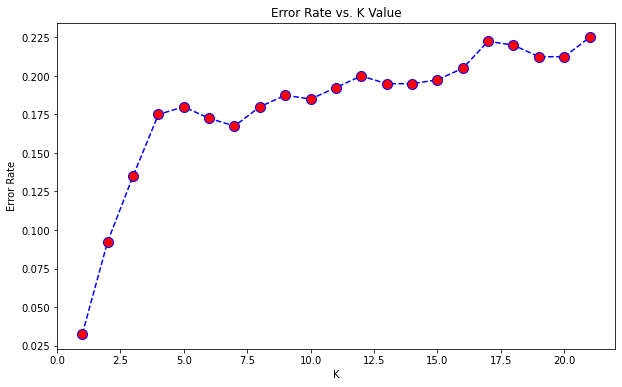

In [35]:
# Lets plot the k-value and error rate to determine the value of k

plt.figure(figsize=(10,6))
plt.plot(range(1,22),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Step-V: Define the model & Fit the data to that model:

In [36]:
knn_classifier=KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(x_train,y_train)   

KNeighborsClassifier(n_neighbors=7)

* How we fit the data to the model:
   * Basically we train the model on past data(the data which we already have) and we fit the model by passing the 
     x_train and y_train as we train our model with some inputs and outputs.

In [37]:
y_pred = knn_classifier.predict(x_test)

# Evaluating the model:

In [38]:
from sklearn.metrics import accuracy_score,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       269
           1       0.77      0.70      0.73       131

    accuracy                           0.83       400
   macro avg       0.81      0.80      0.81       400
weighted avg       0.83      0.83      0.83       400



In [39]:
accuracy_score(y_test,y_pred)

0.8325

#  # Balancing the imbalance data:

In [41]:
data.Outcome.value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

* So,see the data is imbalance because more of the samples biased toward the 0's 

### Imbalance data can be handled by apply centrain techniques:
      1.) Oversampling
      2.) Undersampling

### SMOTE  (Synthetic minority oversampling technique) -
* It is a technique that generates new observations by interpolation between observations in the original dataset.
Interpolation is done with the help of knn algorithm.
* For SMOTE install imblearn library

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smote_object = SMOTE()

### Condition:
* Apply smote only on the training data because for testing data while on production,data may or may not be the balance data

In [45]:
x_train_smote,y_train_smote = smote_object.fit_resample(x_train.astype('float'),y_train)

In [47]:
from collections import Counter

In [49]:
print('Actual_classes:',Counter(y_train))
print('Smote_classes:',Counter(y_train_smote))

Actual_classes: Counter({0: 1047, 1: 553})
Smote_classes: Counter({0: 1047, 1: 1047})


# Model on balanced data

In [55]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train_smote, y_train_smote)

KNeighborsClassifier()

In [57]:
y_predict = knn2.predict(x_test)

In [58]:
accuracy_score(y_test,y_pred)

0.8325

In [59]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       269
           1       0.68      0.89      0.77       131

    accuracy                           0.83       400
   macro avg       0.81      0.84      0.82       400
weighted avg       0.85      0.83      0.83       400

